In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import math
import statistics
import operator

c:\users\beatriz\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\beatriz\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\beatriz\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Exporting and preparing data from .csv

data = pd.read_csv("invites.csv", sep = ";", encoding="latin-1")  
data = data.fillna("NaN")

# Testing purpose
data.head()

,invite_id,employer_id,candidate_id,state,first_interview_medium,min_salary_range,max_salary_range,company_id,candidate_rejection_reason,info_asked,company_refused,company_rejection_reason,job_start_date,job_salary
0,216,45,2686,refused_and_comunicated,presencial,4800.0,6000.0,182,NaN,f,f,NaN,NaN,NaN
1,217,416,2067,post_interview_feedback_requested,presencial,5000.0,6000.0,161,NaN,f,f,NaN,NaN,NaN
2,218,416,1901,post_interview_feedback_requested,presencial,5600.0,6000.0,161,NaN,f,f,NaN,NaN,NaN
3,219,416,1105,hired,presencial,3000.0,4000.0,161,NaN,f,f,NaN,02-01-15 2:00,3500
4,221,1125,389,awaiting_company_schedule,presencial,13000.0,14000.0,2,NaN,t,f,NaN,NaN,NaN


In [3]:
# Building dict to associate amount of invite_ids and candidates numbers to each employer

empl_dict_ivts, empl_dict_ivts_per_cand, empl_dict_cand = {}, {}, {}
max_invites, max_inviter = 0, ""
max_invites_ex, max_inviter_ex = 0, "" 
invites_int = []

for i in range(data.shape[0]): # Iterate through all data lenght
    
    invite_id, employer_id, candidate_id = data[['invite_id', 'employer_id', 'candidate_id']].loc[i]
    
    if invite_id not in invites_int:  # verifying if the invite_ids are unique
    
        # Counting invites
        if str(employer_id) in empl_dict_ivts:
            empl_dict_ivts[str(employer_id)] += 1
            if empl_dict_ivts[str(employer_id)]>max_invites:
                max_invites = empl_dict_ivts[str(employer_id)]
                max_inviter = str(employer_id) 
        else:
            empl_dict_ivts[str(employer_id)] = 1

        if str(employer_id) not in empl_dict_ivts_per_cand:
            empl_dict_ivts_per_cand[str(employer_id)] = 1

        #Counting inivtes, excluding different invites to the same person (counting one invite per person)
        if str(employer_id) in empl_dict_cand:
            if str(candidate_id) not in empl_dict_cand[str(employer_id)]:
                empl_dict_cand[str(employer_id)].append(str(candidate_id))
                empl_dict_ivts_per_cand[str(employer_id)]+=1
                if empl_dict_ivts_per_cand[str(employer_id)] > max_invites_ex:
                    max_invites_ex = empl_dict_ivts_per_cand[str(employer_id)]
                    max_inviter_ex = str(employer_id) 
        else:
            try:
                empl_dict_cand[str(employer_id)].append(str(candidate_id))
            except:
                empl_dict_cand[str(employer_id)] = []
    
    invites_int.append(invite_id)
        
# Testing purpose
print(max_inviter, max_invites)
print(max_inviter_ex, max_invites_ex)

23165.0 220
23165.0 206


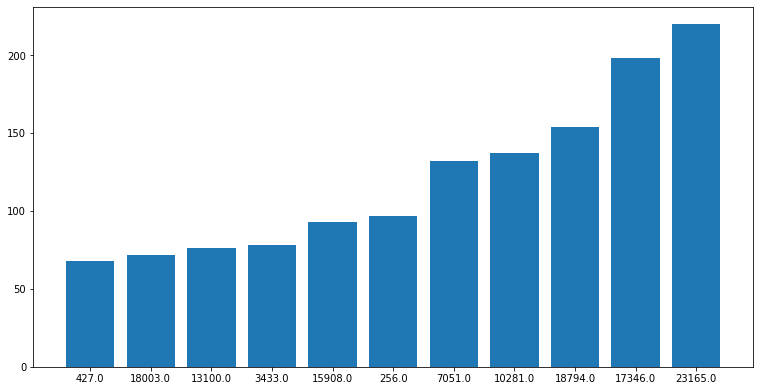

In [4]:
# Shows the 10 companies that send the most invites
s_empl_dict_ivts = sorted(empl_dict_ivts.items(), key=operator.itemgetter(1))
s_empl_dict_ivts = s_empl_dict_ivts[len(s_empl_dict_ivts)-11:len(s_empl_dict_ivts)]

x, y = zip(*s_empl_dict_ivts) # unpack a list of pairs into two tuples

fig = plt.figure(figsize=(10,5))

ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)

plt.show()

In [5]:
# Exporting and preparing data from .csv

data_invites = pd.read_csv("invites.csv", sep = ";", encoding="latin-1")  
data_users = pd.read_csv("users.csv", sep = ";", encoding="latin-1")
data_invites = data_invites.fillna("NaN")
data_users = data_users.fillna("NaN")

# Testing purpose
data_users.head()

,user_id,sign_in_count,pretensao_salarial,test_status,want_to_change,home_office_only,gender,invintable_reason,is_employer,company_id
0,35,4,8000,passed,10,f,male,NaN,f,NaN
1,47,11,NaN,not_done,NaN,f,male,NaN,f,NaN
2,49,47,7000,not_done,3,f,male,outside_hire,f,NaN
3,76,21,11000,passed,10,f,male,employed,f,NaN
4,98,29,6500,not_done,10,f,male,platform_hire,f,NaN


In [7]:
candidates_dict, users_dict, employers_dict = {}, {}, {}

for i in range(data_invites.shape[0]): 
    
    employer_id, candidate_id, state, min_sal, max_sal, job_sal = data_invites[['employer_id', 'candidate_id', 'state', 'min_salary_range', 'max_salary_range', 'job_salary']].loc[i]
    if str(candidate_id) not in candidates_dict:
        candidates_dict[str(candidate_id)] = {}
        candidates_dict[str(candidate_id)]["state"] = [state]
        candidates_dict[str(candidate_id)]["employer_id"] = [employer_id]
        candidates_dict[str(candidate_id)]["range_sal"] = [[min_sal, max_sal]]
        candidates_dict[str(candidate_id)]["avg_sal"] = [(min_sal+max_sal)/2]
        candidates_dict[str(candidate_id)]["job_sal"] = [job_sal] 
    else:
        candidates_dict[str(candidate_id)]["state"].append(state)
        candidates_dict[str(candidate_id)]["avg_sal"].append((min_sal+max_sal)/2)
        candidates_dict[str(candidate_id)]["job_sal"].append(job_sal)
        candidates_dict[str(candidate_id)]["employer_id"].append(employer_id)
        candidates_dict[str(candidate_id)]["range_sal"].append([min_sal, max_sal])
        
for i in range(data_users.shape[0]):
    
    user_id, pretensao_salarial, is_employer, gender, company_id = data_users[['user_id', 'pretensao_salarial', 'is_employer', 'gender', 'company_id']].loc[i]
    if is_employer == "f":
        if str(user_id) not in users_dict: 
            users_dict[str(user_id)] = {}
            users_dict[str(user_id)]["pretensao_salarial"] = pretensao_salarial
            users_dict[str(user_id)]["gender"] = gender
    else:
        if str(company_id) not in employers_dict: 
            employers_dict[str(company_id)] = {}
            employers_dict[str(company_id)]["pretensao_salarial"] = pretensao_salarial
            employers_dict[str(company_id)]["gender"] = gender
            
            
        

In [8]:
is_disappointed, is_really_disappointed = 0, 0 # amount of candidates with expectitions higher than the avg of salary range, and max of salary range
disappointment_diff_avg, disappointment_diff_max = [], []
candidates_per_sal_range = {}
pretensoes_per_sal_range = {}
invites_per_sal_range = {}

for candidate in candidates_dict:
    
    if candidate in users_dict:
        
        min_for_candidate, max_for_candidate = math.inf, 0 
        pretensao_salarial = users_dict[candidate]["pretensao_salarial"]
        
        if pretensao_salarial!= "NaN":
            if pretensao_salarial - pretensao_salarial%100 not in pretensoes_per_sal_range:
                pretensoes_per_sal_range[pretensao_salarial - pretensao_salarial%100] = 1
            else:
                pretensoes_per_sal_range[pretensao_salarial - pretensao_salarial%100] += 1
        
        for range_sal_i in candidates_dict[candidate]["range_sal"]:
            if range_sal_i[0] < min_for_candidate:
                min_for_candidate = range_sal_i[0]
            if range_sal_i[1] > max_for_candidate:
                max_for_candidate = range_sal_i[1]
            
            if pretensao_salarial!= "NaN":
                if pretensao_salarial > statistics.mean(range_sal_i):
                    is_disappointed += 1
                    disappointment_diff_avg.append(pretensao_salarial-statistics.mean(range_sal_i))

                if pretensao_salarial > range_sal_i[1]:
                    is_really_disappointed += 1
                    disappointment_diff_max.append(pretensao_salarial-range_sal_i[1])
            
            for sal_i in range(int(range_sal_i[0])- int(range_sal_i[0])%100, int(range_sal_i[1]) - int(range_sal_i[1])%100, 100): # each salary range is spaced by a hundred
                if sal_i not in invites_per_sal_range:
                    invites_per_sal_range[sal_i] = 1
                else:
                    invites_per_sal_range[sal_i] += 1
        
        #print(int(min_for_candidate), int(max_for_candidate))
        
        for sal_i in range(int(min_for_candidate) - int(min_for_candidate)%100, int(max_for_candidate) - int(max_for_candidate)%100, 100):
            if sal_i not in candidates_per_sal_range:
                candidates_per_sal_range[sal_i] = 1
            else:
                candidates_per_sal_range[sal_i] += 1
                
                    
                
    

In [9]:
print(data_invites.shape[0])
print(is_disappointed, is_really_disappointed)
print(statistics.mean(disappointment_diff_avg), statistics.mean(disappointment_diff_max))

5247
2416 1483
1986.5898592715232 2233.412677006069


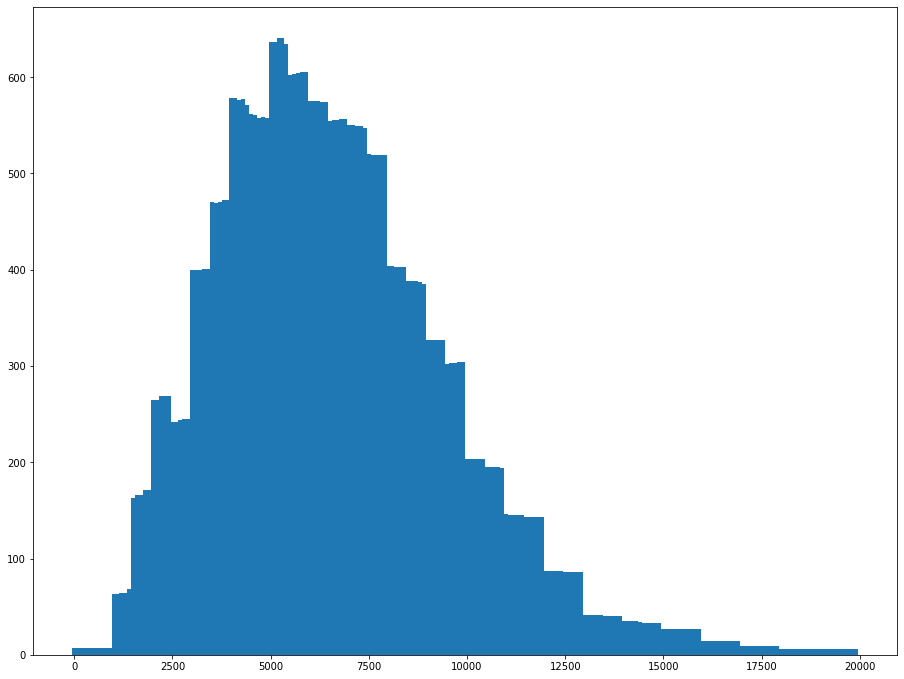

In [10]:
lists = sorted(candidates_per_sal_range.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure(figsize=(12,9))

ax = fig.add_axes([0,0,1,1])

hundred_list = []
for i in x:
    hundred_list.append(100)
    
ax.bar(x,y, hundred_list)

plt.show()

<Figure size 432x288 with 0 Axes>

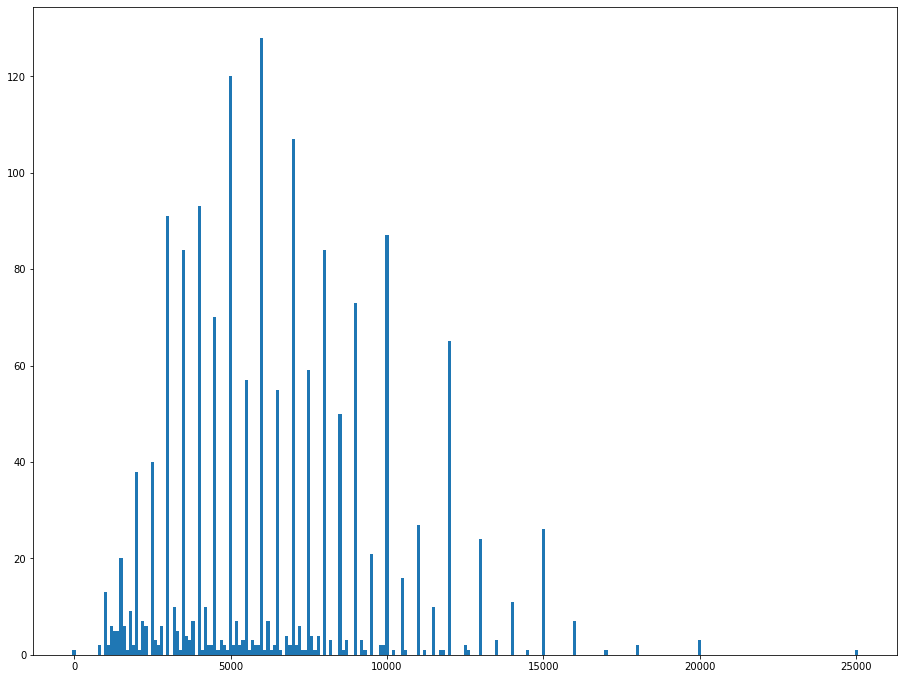

In [11]:
lists = sorted(pretensoes_per_sal_range.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure()
fig = plt.figure(figsize=(12,9))

ax = fig.add_axes([0,0,1,1])
hundred_list = []
for i in x:
    hundred_list.append(100)
ax.bar(x,y, hundred_list)

plt.show()

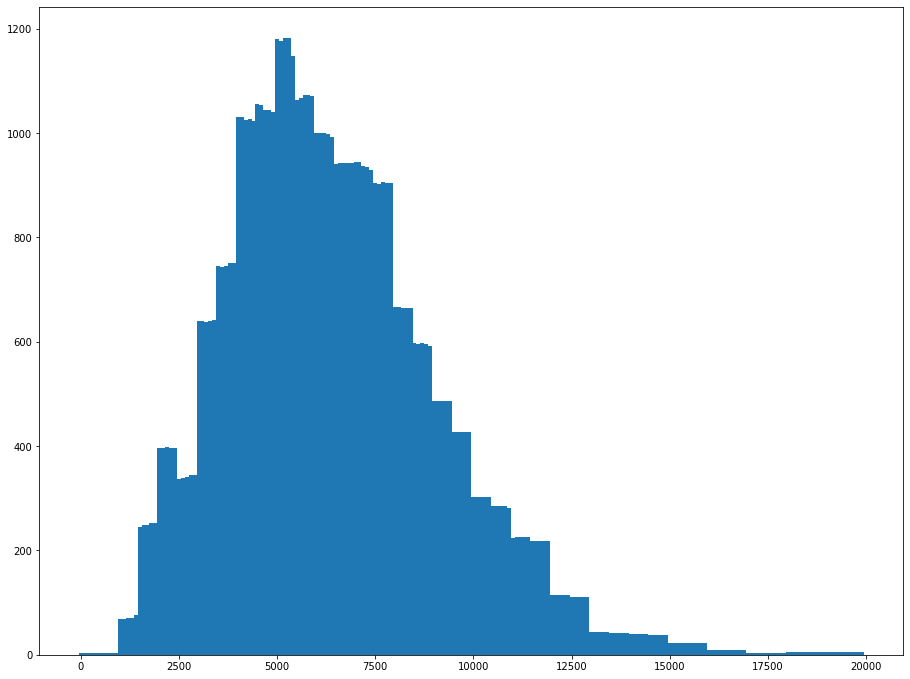

In [12]:
lists = sorted(invites_per_sal_range.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure(figsize=(12,9))

ax = fig.add_axes([0,0,1,1])

hundred_list = []
for i in x:
    hundred_list.append(100)
ax.bar(x,y, hundred_list)

plt.show()

In [13]:
company_hire_dict = {}
max_hires, max_company_hires = 0, 0

for candidate in candidates_dict:
    
    for state_i in range(len(candidates_dict[candidate]["state"])):
        if candidates_dict[candidate]["state"][state_i] == "hired":
            if str(candidates_dict[candidate]["employer_id"][state_i]) not in company_hire_dict:
                company_hire_dict[str(candidates_dict[candidate]["employer_id"][state_i])] = 1
            else:
                company_hire_dict[str(candidates_dict[candidate]["employer_id"][state_i])]+=1
                if company_hire_dict[str(candidates_dict[candidate]["employer_id"][state_i])]>max_hires:
                    max_hires = company_hire_dict[str(candidates_dict[candidate]["employer_id"][state_i])]
                    max_company_hires = candidates_dict[candidate]["employer_id"][state_i]

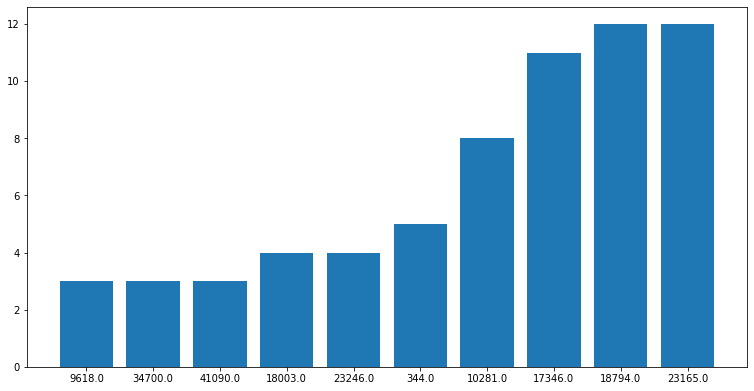

In [14]:
# Shows the 10 companies that send the most invites
sorted_company_hire_dict = sorted(company_hire_dict.items(), key=operator.itemgetter(1))
sorted_company_hire_dict = sorted_company_hire_dict[len(sorted_company_hire_dict)-10:len(sorted_company_hire_dict)]

x, y = zip(*sorted_company_hire_dict) # unpack a list of pairs into two tuples

fig = plt.figure(figsize=(10,5))

ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)

plt.show()

In [16]:
sal_ranges, sal_ranges_nh = {}, {} # nh stands for not hired
sal_ranges_int, sal_ranges_int_nh = [], []

for candidate in candidates_dict:
    for empl_i in range(len(candidates_dict[candidate]["employer_id"])):
        if str(candidates_dict[candidate]["employer_id"][empl_i]) == sorted_company_hire_dict[len(sorted_company_hire_dict)-1][0]:
            if candidates_dict[candidate]["state"][empl_i] == "hired":
                range_sal_i = candidates_dict[candidate]["range_sal"][empl_i]
                sal_ranges_int.append(range_sal_i)
                for sal_i in range(int(range_sal_i[0])- int(range_sal_i[0])%100, int(range_sal_i[1]) - int(range_sal_i[1])%100 , 100): # each salary range is spaced by a hundred
                    if sal_i not in sal_ranges:
                        sal_ranges[sal_i] = 0
                    else:
                        sal_ranges[sal_i] += 1
            else:
                range_sal_i = candidates_dict[candidate]["range_sal"][empl_i]
                sal_ranges_int_nh.append(range_sal_i)
                for sal_i in range(int(range_sal_i[0])- int(range_sal_i[0])%100, int(range_sal_i[1]) - int(range_sal_i[1])%100 , 100): # each salary range is spaced by a hundred
                    if sal_i not in sal_ranges:
                        sal_ranges_nh[sal_i] = 0
                    else:
                        sal_ranges_nh[sal_i] += 1
            
            
        

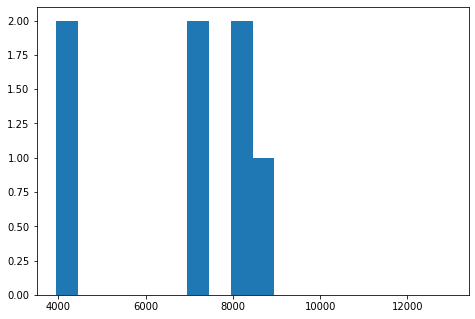

In [18]:
lists = sorted(sal_ranges.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
hundred_list = []
for i in x:
    hundred_list.append(100)
ax.bar(x,y, hundred_list)

plt.show()



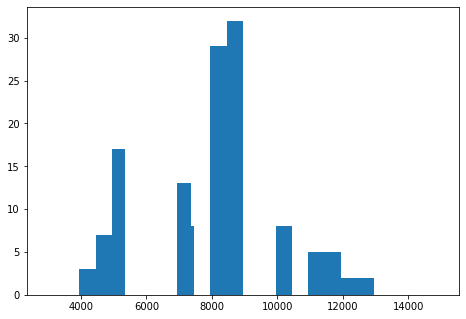

In [208]:
lists = sorted(sal_ranges_nh.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
hundred_list = []
for i in x:
    hundred_list.append(100)
ax.bar(x,y, hundred_list)

plt.show()


In [31]:
# Calculating the mode of the distribution

sal_ranges_int = sorted(sal_ranges_int)  # Sorting makes the loop below more efficient (instead of O(n2) complexity, O(n) complexity is used)
sal_ranges_int_nh = sorted(sal_ranges_int_nh) # Sorting alone has O(nlogn) complexity

mode_range = {}
for sal_i in range(len(sal_ranges_int)-1):
    if str(sal_ranges_int[sal_i]) not in mode_range:
        mode_range[str(sal_ranges_int[sal_i])] = 0
    if sal_ranges_int[sal_i] == sal_ranges_int[sal_i+1]:
        mode_range[str(sal_ranges_int[sal_i])]+=1
        
mode_range_nh = {}
for sal_i in range(len(sal_ranges_int_nh)-1):
    if str(sal_ranges_int_nh[sal_i]) not in mode_range_nh:
        mode_range_nh[str(sal_ranges_int_nh[sal_i])] = 0
    if sal_ranges_int_nh[sal_i] == sal_ranges_int_nh[sal_i+1]:
        mode_range_nh[str(sal_ranges_int_nh[sal_i])]+=1
            
mode_range = sorted(mode_range.items(), key=operator.itemgetter(1))
mode_range_nh = sorted(mode_range_nh.items(), key=operator.itemgetter(1))
    
print(mode_range[len(mode_range)-1], mode_range_nh[len(mode_range_nh)-1])


('[7000.0, 7500.0]', 2) ('[5000.0, 5400.0]', 25)
